# How to Use Mask R-CNN in Keras for Object Detection in Photographs
https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

In [37]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from matplotlib import pyplot
from matplotlib.patches import Rectangle

img_path = '../third_party/Mask_RCNN/samples/images/elephant.jpg'

In [23]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Load Model

In [9]:
class TestConfig(Config):
        NAME = "TEST"
        GPU_COUNT = 1
        IMAGES_PER_GPU = 1
        NUM_CLASSES = 1 + 80

rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
rcnn.load_weights('../third_party/Mask_RCNN/models/mask_rcnn_coco.h5', by_name=True)

## Load Image

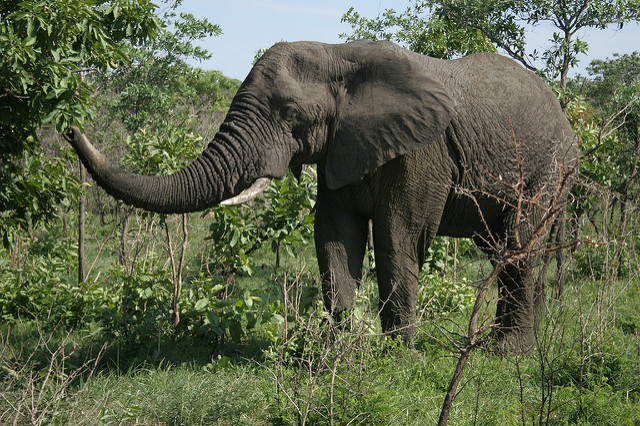

In [21]:
img = load_img(img_path)
img

In [34]:
img = img_to_array(img)

## Detection

In [35]:
results = rcnn.detect([img])
class_names[int(results[0]['class_ids'])]

'elephant'

In [16]:
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

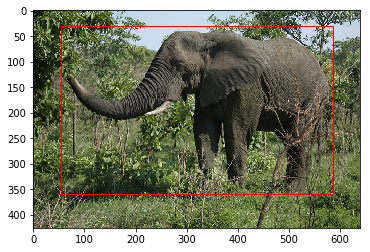

In [22]:
draw_image_with_boxes(img_path, results[0]['rois'])

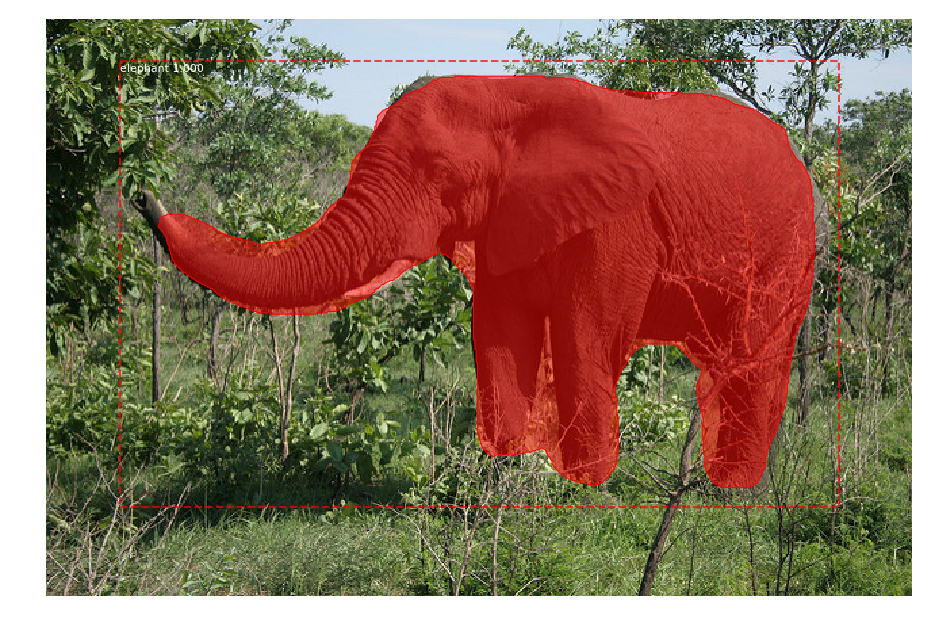

In [38]:
r = results[0]
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

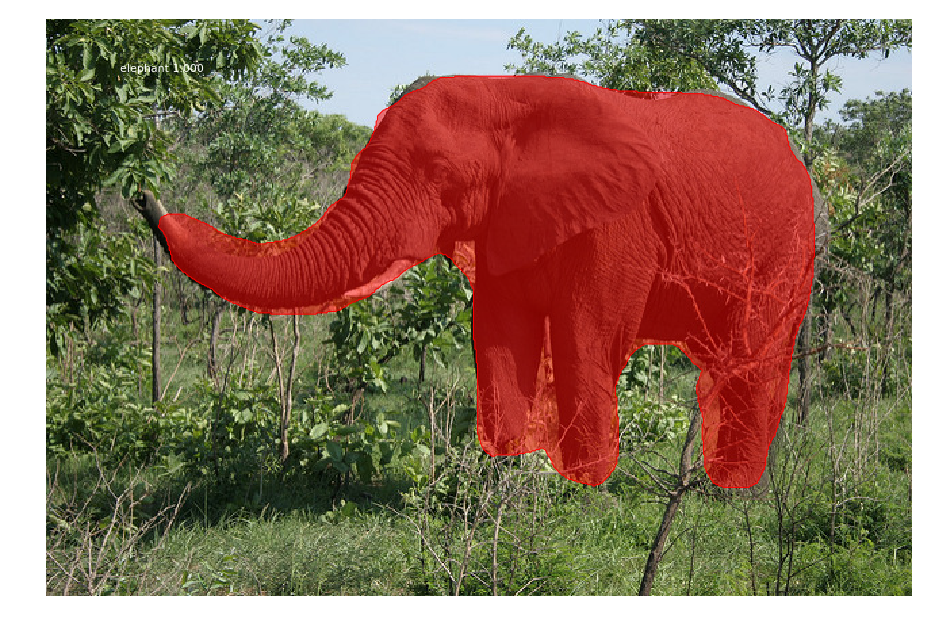

In [39]:
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], show_bbox=False)